In [3]:
path = './스마트/04/dataset/'

In [7]:
!pip install glob2

  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=abe1ec35dba8f9e56e554a13ea49b3e10d4cfd517876699530c23bf4f4ba8a48
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c0\dd\ee\ba6164807de7570971e8f160dbe6a4178ff4e5922f48c093be
Successfully built glob2


In [4]:
import glob2

In [5]:
filelists = glob2.glob(path+"*.*")
filelists

['./스마트/04/dataset\\labeled_data.csv',
 './스마트/04/dataset\\moldset_labeled.csv',
 './스마트/04/dataset\\moldset_labeled_cn7.csv',
 './스마트/04/dataset\\moldset_labeled_rg3.csv',
 './스마트/04/dataset\\moldset_unlabeled_cn7.csv',
 './스마트/04/dataset\\moldset_unlabeled_rg3.csv',
 './스마트/04/dataset\\supervised_label_cn7.csv',
 './스마트/04/dataset\\unlabeled_data.csv']

In [6]:
import pandas as pd
import numpy as np

In [7]:
dflists = [pd.read_csv(i,index_col=0) for i in filelists]

In [8]:
label_data = dflists[0]

In [9]:
np.unique(label_data.EQUIP_NAME,return_counts=True)  # '650톤-우진2호기'만 사용

(array(['1800TON-우진', '650톤-우진', '650톤-우진2호기'], dtype=object),
 array([   2,    2, 7992], dtype=int64))

In [10]:
np.unique(label_data.PART_NAME,return_counts=True) # 제품이름  데이터가 충분한  "CN7계열과 RG3계열"

(array(["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH",
        "JX1 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH",
        "RG3 MOLD'G W/SHLD, RH", 'SP2 CVR ROOF RACK CTR, RH'], dtype=object),
 array([3365, 3371,    2,  628,  628,    2], dtype=int64))

In [11]:
label_data = label_data.reset_index()

In [12]:
pd.options.display.max_columns = None

In [13]:
label_data.describe()
# 'Switch_Over_Position'

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.0,7996.0,7996.000000,7996.000000,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0
mean,11.248749,8.242189,3.896309,16.209505,59.900902,7.064088,653.408195,0.330320,66.054484,544.244111,66.923612,30.701989,149.023424,142.187970,133.357579,40.706653,59.579340,277.457016,276.706015,276.443122,271.075388,256.507403,230.763295,0.009105,66.458742,0.0,0.0,22.145260,23.522574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.005191,3.107724,1.284451,1.443720,0.885680,0.136595,10.165106,14.654889,5.418233,236.351404,26.460186,0.159179,130.828781,1.951063,7.355402,6.878995,3.403100,6.101631,4.088561,4.099543,2.675956,3.837589,1.945383,0.575642,2.577198,0.0,0.0,1.177468,1.356586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,1.050000,0.930000,10.920000,58.840000,5.160000,11.100000,0.000000,53.549999,4.630000,22.299999,27.100000,25.500000,134.800003,109.699997,2.800000,13.300000,0.000000,244.800003,245.000000,239.600006,235.300003,220.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.000000,9.520000,4.400000,16.580000,59.520000,7.110000,653.429993,0.000000,68.250000,647.989990,55.200001,30.600000,29.200001,141.800003,136.100006,37.700001,59.400002,275.899994,275.000000,274.899994,269.799988,254.899994,229.899994,0.000000,65.400002,0.0,0.0,21.400000,22.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,9.560000,4.440000,16.799999,59.520000,7.120000,653.440002,0.000000,68.339996,647.989990,55.599998,30.700001,29.200001,142.000000,136.500000,38.000000,59.599998,276.200012,275.399994,275.000000,270.700012,255.000000,230.100006,0.000000,66.699997,0.0,0.0,22.000000,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,13.000000,9.590000,4.470000,16.889999,59.560001,7.120000,653.450012,0.000000,68.489998,647.989990,56.099998,30.799999,292.399994,142.199997,136.800003,38.400002,59.900002,276.600006,275.700012,275.399994,271.399994,255.399994,230.199997,0.000000,67.599998,0.0,0.0,22.900000,24.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,24.000000,16.309999,8.270000,21.120001,66.860001,7.180000,655.080017,655.309998,68.860001,883.700012,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,270.399994,264.299988,36.400002,70.599998,0.0,0.0,25.299999,27.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 데이터 정제(전처리)  
def make_input(data, machine_name, product_name):
    returndata = data.copy(deep = True)
    machine_ = returndata['EQUIP_NAME'] == machine_name
    product_ = returndata['PART_NAME'] == product_name
    returndata['machine_'] = machine_
    returndata['product_'] = product_
    
    returndata.drop(
        ['_id','TimeStamp','PART_FACT_PLAN_DATE','PART_FACT_SERIAL','EQUIP_CD','Reason','EQUIP_NAME','PART_NAME'
            ,'Mold_Temperature_1','Mold_Temperature_2','Mold_Temperature_5','Mold_Temperature_6'
            ,'Mold_Temperature_7','Mold_Temperature_8','Mold_Temperature_9','Mold_Temperature_10'
            ,'Mold_Temperature_11','Mold_Temperature_12','Switch_Over_Position'
        ],axis=1, inplace=True
    )
    return returndata

In [15]:
# 함수 실행
machine_name = '650톤-우진2호기'
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH","RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH"]

In [16]:
# 650톤-우진2호기의 CN7 W/S SIDE MLD'G LH 데이터만 제거해서 
cn7lh = make_input(label_data,machine_name,product_name[0])
cn7rh = make_input(label_data,machine_name,product_name[1])
rg3lh = make_input(label_data,machine_name,product_name[2])
rg3rh = make_input(label_data,machine_name,product_name[3])

# 동일한 제품의 lh와 rh 합친다
cn7 = pd.concat([cn7lh,cn7rh],ignore_index=True)
rg3 = pd.concat([rg3lh,rg3rh],ignore_index=True)

In [17]:
cn7.PassOrFail.replace({'Y':0, 'N':1},inplace=True)

In [18]:
# 제품별로 모델링을 한다.
cn7.drop(columns=['Barrel_Temperature_7'],inplace=True)
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,0.008879,8.242189,3.896309,16.209505,59.900902,7.064088,653.408195,66.054484,544.244111,66.923612,30.701989,149.023424,142.187970,133.357579,40.706653,59.579340,277.457016,276.706015,276.443122,271.075388,256.507403,230.763295,66.458742,22.145260,23.522574
std,0.093814,3.107627,1.284410,1.443675,0.885652,0.136591,10.164788,5.418063,236.344014,26.459358,0.159174,130.824690,1.951002,7.355172,6.878779,3.402994,6.101440,4.088433,4.099415,2.675872,3.837469,1.945323,2.577117,1.177431,1.356543
min,0.000000,1.050000,0.930000,10.920000,58.840000,5.160000,11.100000,53.549999,4.630000,22.299999,27.100000,25.500000,134.800003,109.699997,2.800000,13.300000,0.000000,244.800003,245.000000,239.600006,235.300003,220.000000,0.000000,0.000000,0.000000
25%,0.000000,9.520000,4.400000,16.580000,59.520000,7.110000,653.429993,68.250000,647.989990,55.200001,30.600000,29.200001,141.800003,136.100006,37.700001,59.400002,275.899994,275.000000,274.899994,269.799988,254.899994,229.899994,65.400002,21.400000,22.700001
50%,0.000000,9.560000,4.440000,16.799999,59.520000,7.120000,653.440002,68.339996,647.989990,55.599998,30.700001,29.200001,142.000000,136.500000,38.000000,59.599998,276.200012,275.399994,275.000000,270.700012,255.000000,230.100006,66.699997,22.000000,23.400000
75%,0.000000,9.590000,4.470000,16.889999,59.560001,7.120000,653.450012,68.489998,647.989990,56.099998,30.799999,292.399994,142.199997,136.800003,38.400002,59.900002,276.600006,275.700012,275.399994,271.399994,255.399994,230.199997,67.599998,22.900000,24.200001
max,1.000000,16.309999,8.270000,21.120001,66.860001,7.180000,655.080017,68.860001,883.700012,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,270.399994,264.299988,70.599998,25.299999,27.799999


<AxesSubplot:>

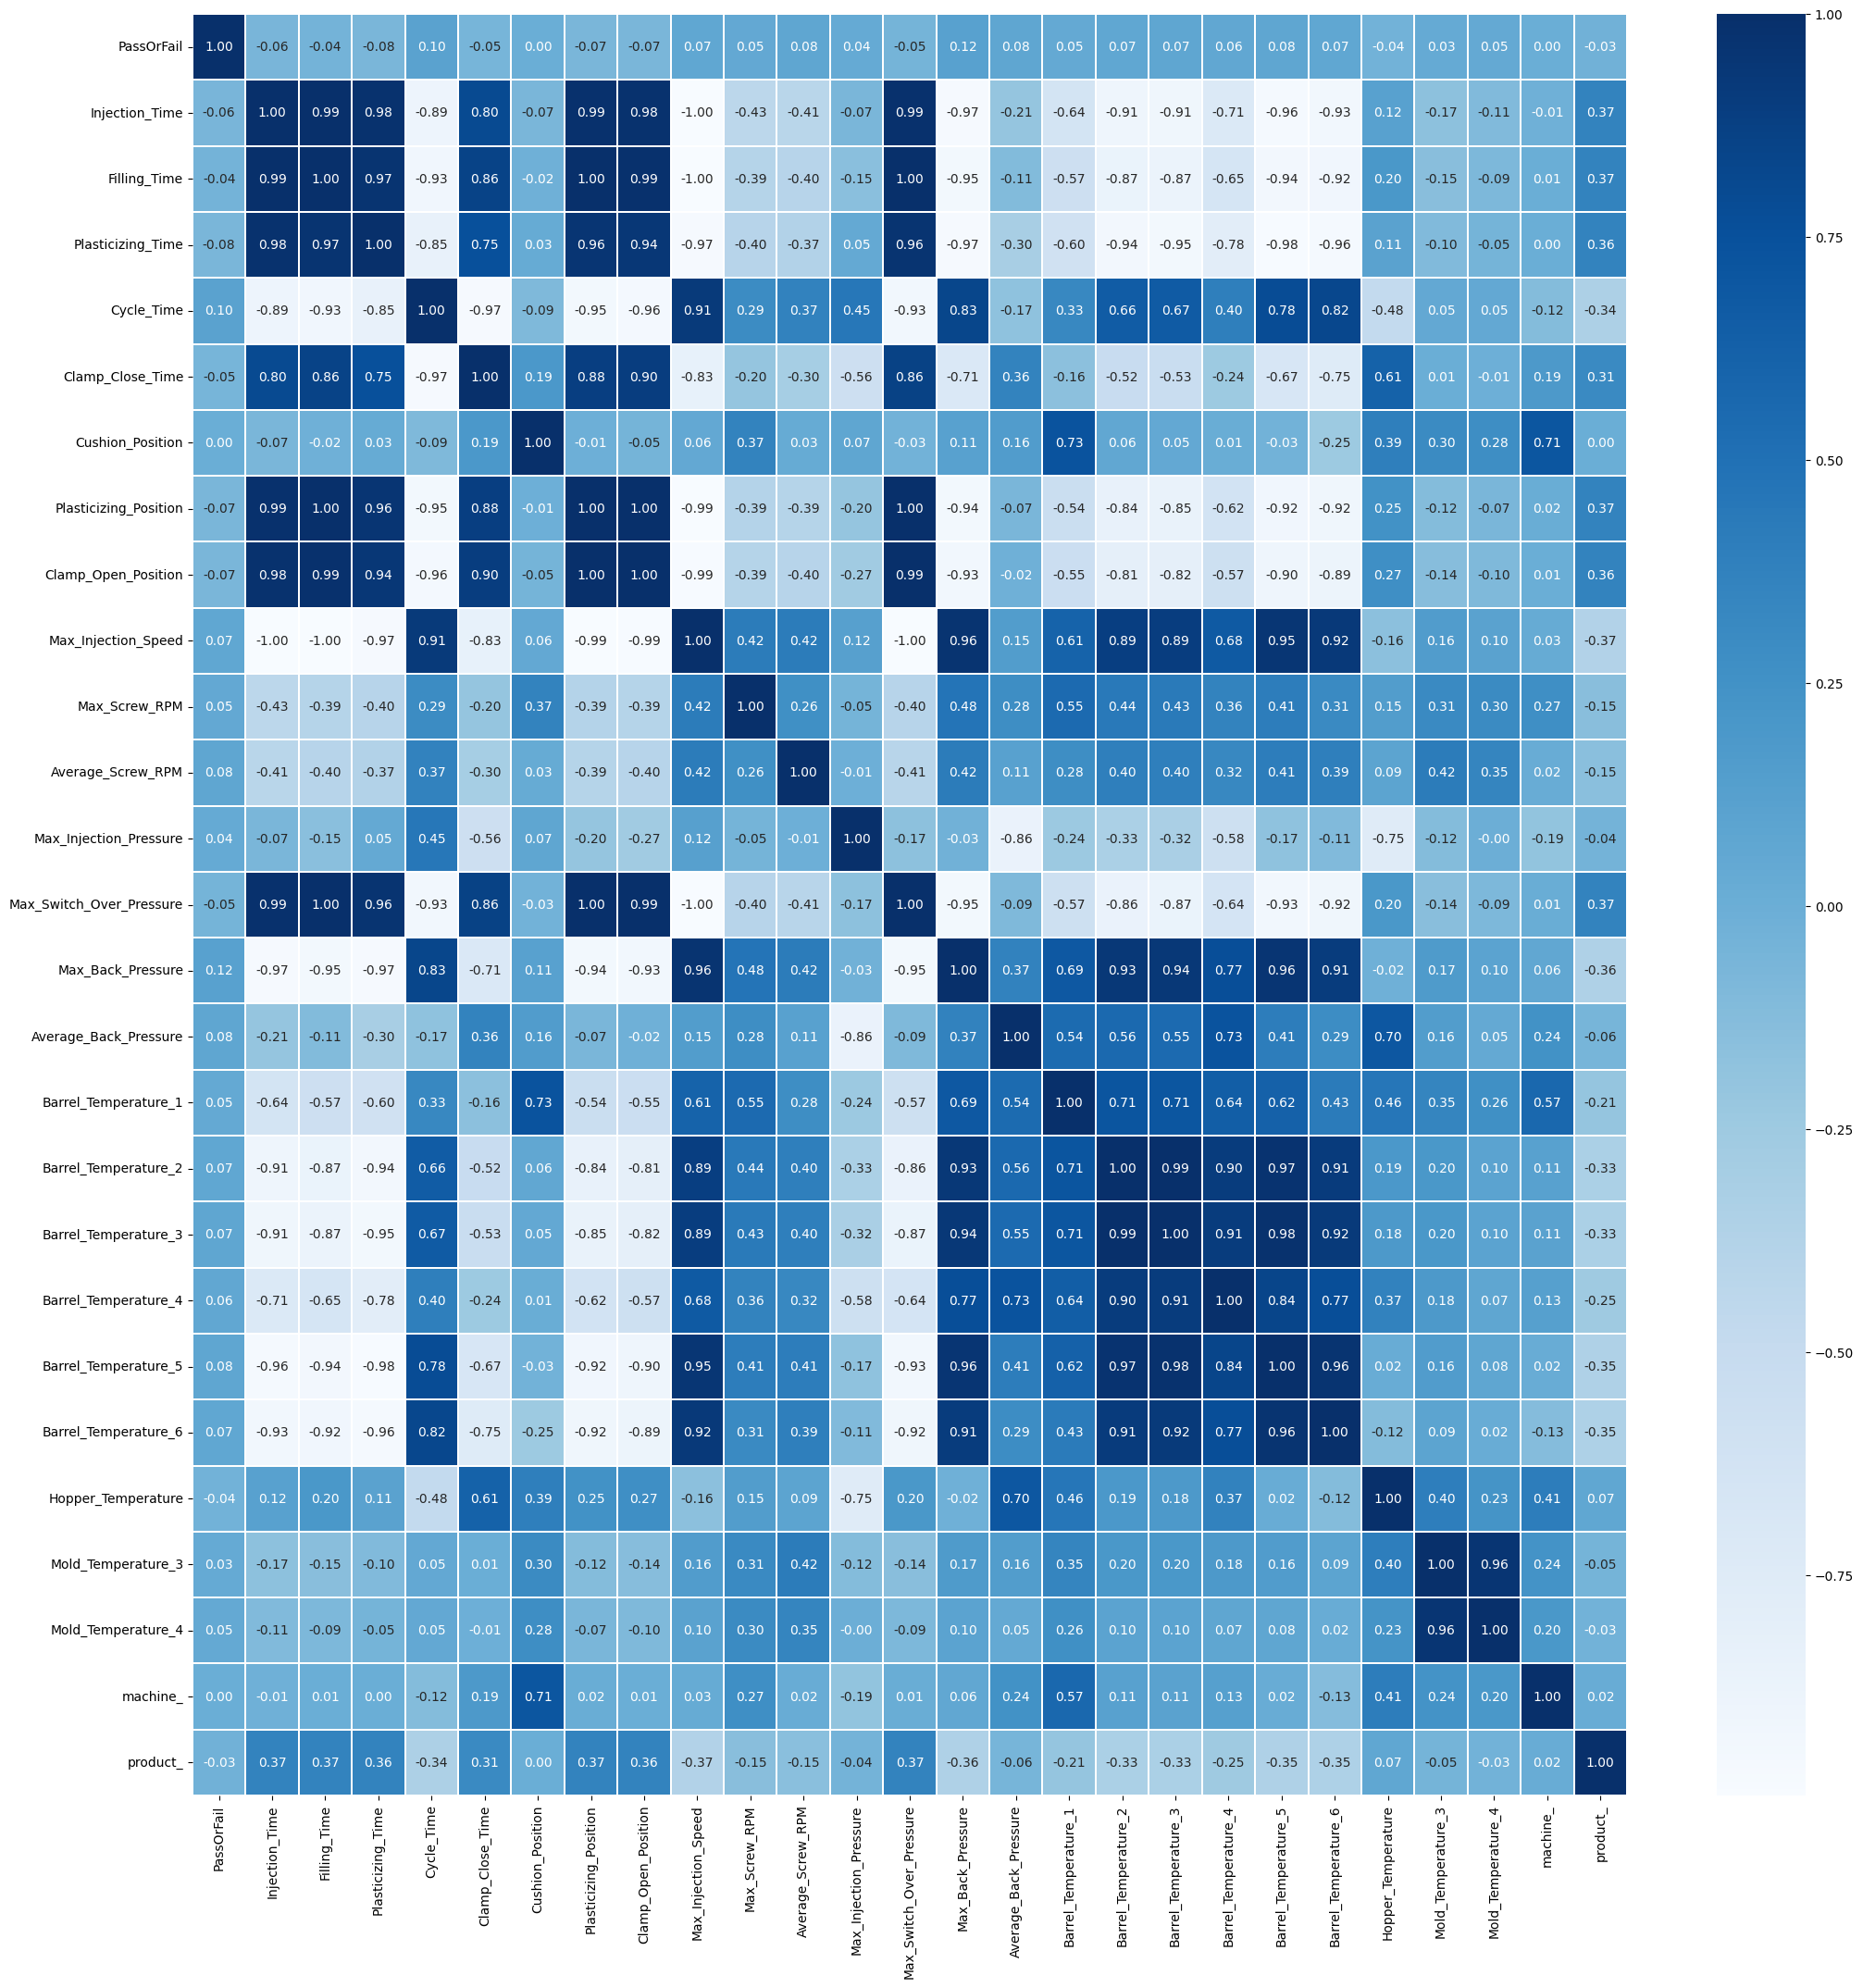

In [21]:
# cn7 제품에 대한 상관관계
# 0.1~0.3 : 약한
# 0.3~ 0.7 : 뚜렸한 상관관계
# 0.7 : 강한
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(data = cn7.corr(),linewidths=0.1, annot=True, fmt='.2f', cmap = 'Blues')

In [23]:
# 변수별 히스토그램
# help(sns.catplot)
# sns.catplot(data = cn7,kind='violin',col_wrap =5)
# sns.pairplot(data = cn7.iloc[:,5:10])

In [24]:
# plt.figure(figsize=(30,30))
# for i in range(3):
#     if i == len(cn7.columns)-1: break
#     plt.subplot(3,3,i+1)
#     sns.histplot(data = cn7.iloc[:,i])
#     plt.title(cn7.columns[i])
# plt.show()    

In [19]:
# 양품
cn7_Y = cn7[cn7.PassOrFail == 0] # 불량
cn7_N = cn7[cn7.PassOrFail == 1]

In [20]:
len(cn7_Y), len(cn7_N)

(15850, 142)

In [21]:
cn7_Y.drop(columns=['PassOrFail'],inplace=True)
cn7_N.drop(columns=['PassOrFail'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18824\635789922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_Y.drop(columns=['PassOrFail'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18824\635789922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_N.drop(columns=['PassOrFail'],inplace=True)


In [22]:
# 데이터정규화  
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
cn7_Y = mms.fit_transform(cn7_Y)
cn7_N = mms.fit_transform(cn7_N)
cn7_Y

array([[0.55963306, 0.91002561, 0.58823525, ..., 0.98920866, 1.        ,
        0.        ],
       [0.56028838, 0.91259637, 0.58725484, ..., 0.9928058 , 1.        ,
        0.        ],
       [0.56028838, 0.91259637, 0.58725484, ..., 0.9928058 , 1.        ,
        1.        ],
       ...,
       [0.56028838, 0.91259637, 0.56176462, ..., 0.8057554 , 1.        ,
        0.        ],
       [0.56028838, 0.91259637, 0.55980379, ..., 0.80215827, 1.        ,
        0.        ],
       [0.56028838, 0.91259637, 0.55980379, ..., 0.80215827, 1.        ,
        1.        ]])

In [49]:
# 학습데이터 평가데이터  6:4 
spi = int(len(cn7_Y)*0.6)
cn7_train_Y = cn7_Y[:spi]  # 학습(양품)
cn7_test_Y = cn7_Y[spi:]   # 평가 (양품)
# 평가데이터
cn7_test_N =  cn7_N  # 평가데이터(불량)

In [50]:
len(cn7_train_Y),len(cn7_test_Y),len(cn7_test_N)

(9510, 6340, 142)

In [1]:
# 오토인코더 구축
import tensorflow as tf

In [62]:
# 인코더
dropout_encorder =  tf.keras.models.Sequential(
    [
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(15,activation='relu'),        
        tf.keras.layers.Dense(5,activation='relu'),    ]
)

In [63]:
# 디코더
dropout_decoder = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(15,activation='relu', input_shape = [5]),        
        tf.keras.layers.Dense(cn7_train_Y.shape[1],activation='softmax')
    ]
)

In [64]:
dropout_ae = tf.keras.models.Sequential([dropout_encorder,dropout_decoder])

In [68]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7),
    tf.keras.callbacks.ModelCheckpoint("autoencode.keras",save_best_only=True)
]
dropout_ae.compile(loss='mse', optimizer='adam', metrics=['acc'])
hist = dropout_ae.fit(cn7_train_Y,cn7_train_Y,batch_size=64, epochs=200,validation_split=0.2
                      ,callbacks=callbacks)

Epoch 1/200
119/119 [==============================] - 1s 8ms/step - loss: 0.4840 - acc: 0.8026 - val_loss: 0.5013 - val_acc: 0.9448
Epoch 2/200
119/119 [==============================] - 1s 6ms/step - loss: 0.4840 - acc: 0.8571 - val_loss: 0.5013 - val_acc: 0.9448
Epoch 3/200
119/119 [==============================] - 1s 5ms/step - loss: 0.4840 - acc: 0.8436 - val_loss: 0.5013 - val_acc: 0.9395
Epoch 4/200
119/119 [==============================] - 1s 6ms/step - loss: 0.4840 - acc: 0.7721 - val_loss: 0.5013 - val_acc: 0.7587
Epoch 5/200
119/119 [==============================] - 1s 6ms/step - loss: 0.4840 - acc: 0.7992 - val_loss: 0.5013 - val_acc: 0.9448
Epoch 6/200
119/119 [==============================] - 1s 6ms/step - loss: 0.4840 - acc: 0.8140 - val_loss: 0.5013 - val_acc: 0.9448
Epoch 7/200
119/119 [==============================] - 1s 5ms/step - loss: 0.4840 - acc: 0.8045 - val_loss: 0.5013 - val_acc: 0.9448
Epoch 8/200
119/119 [==============================] - 1s 6ms/step - 

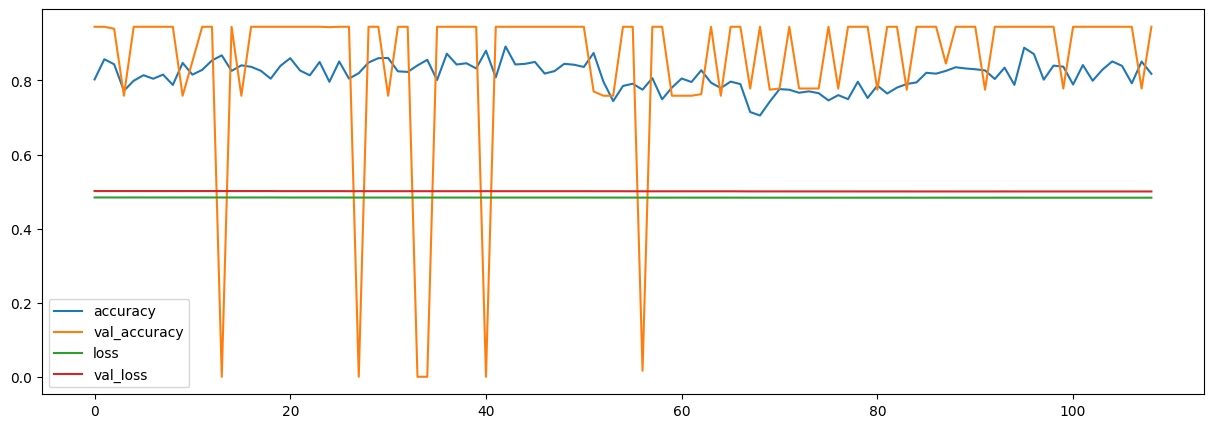

In [69]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['acc'],label = 'accuracy')
plt.plot(hist.history['val_acc'],label = 'val_accuracy')
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [70]:
model = tf.keras.models.load_model('autoencode.keras')
model.evaluate(cn7_train_Y,cn7_train_Y)

298/298 [==============================] - 1s 3ms/step - loss: 0.4867 - acc: 0.9691


[0.48669904470443726, 0.969085156917572]

In [ ]:
# 임계값을정의 - 시그마6
# 정상데이터는 복원시 : 오착 적다
# 불량은 덜 복원 : 오차가 크다
# 3시그마 규칙(three - sigma rule)  평균에서 양쪽으로 3 표준편차범위에 거의 모든값  99.7 이상의 값을 임계치로 정함

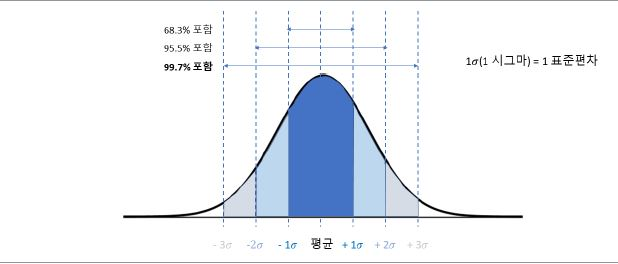

In [2]:
# 학습데이터 예측
model = tf.keras.models.load_model('autoencode.keras')

In [25]:
cn7_train_pred =  model.predict(cn7_train_Y)
# 학습데이터의 복원 오차(예측값-  실제 값)
cn7_train_loass = np.mean( np.square( cn7_train_pred - cn7_train_Y), axis = 1)

298/298 [==============================] - 2s 3ms/step


In [26]:
# 임계치

threshold = np.mean(cn7_train_loass) + 5*np.std(cn7_train_loass)
print(f"복원 임계치 : {threshold}")

복원 임계치 : 0.6639148401204373


In [27]:
cn7_train_loass

array([0.51097944, 0.51810859, 0.55657625, ..., 0.45931095, 0.45931095,
       0.45581447])

199/199 [==============================] - 1s 3ms/step


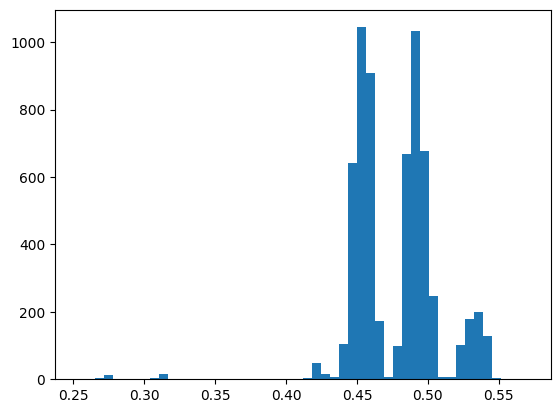

In [29]:
# 평가용 데이터 양품
# 예측값
cn7_predict_y = model.predict(cn7_test_Y)
# 복원오치 (예측값 -  실제값)
cn7_test_y_mse =  np.mean(np.square(cn7_predict_y - cn7_test_Y),axis = 1)
# 시각화
import matplotlib.pyplot as plt
plt.hist(cn7_test_y_mse, bins = 50)
plt.show()

In [31]:
# 불량으로 판단된 데이터는
cn_test_y_abnormal = cn7_test_y_mse > threshold
print(f"불량 개수: {np.sum(cn_test_y_abnormal)}")

불량 개수: 0


5/5 [==============================] - 0s 6ms/step


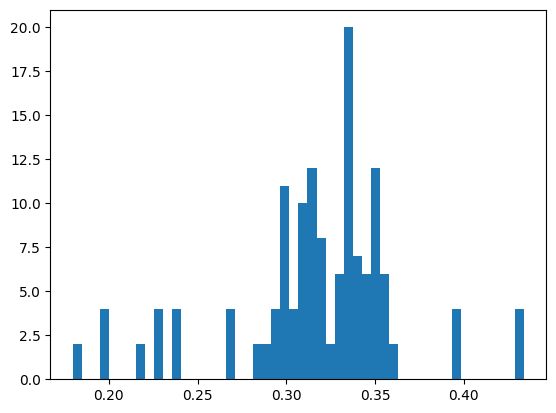

불량 개수: 0


In [51]:
# 훈련용 데이터 불량

# 예측값
cn7_predict_N = model.predict(cn7_test_N)
# 복원오치 (예측값 -  실제값)
cn7_test_n_mse =  np.mean(np.square(cn7_predict_N - cn7_test_N),axis = 1)
# 시각화
import matplotlib.pyplot as plt
plt.hist(cn7_test_n_mse, bins = 50)
plt.show()

cn_train_n_abnormal = cn7_test_n_mse > threshold
print(f"불량 개수: {np.sum(cn_test_y_abnormal)}")

In [48]:
# 혼돈매트릭스
len(cn7_test_y_mse), len(cn7_train_y_mse)

(6340, 9510)